Era prediction using VGG16 model
----

In [2]:
%matplotlib inline

In [47]:
# Imports
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
import keras

# https://github.com/fastai/courses/blob/master/deeplearning1/nbs/utils.py
import utils; reload(utils)
from utils import plots

# https://github.com/fastai/courses/blob/master/deeplearning1/nbs/vgg16.py
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [4]:
# Settings
batch_size = 64
nb_epoch = 20

In [54]:
# Testing with erasmus datasets
vgg = Vgg16()

data_dir = "../data"
# dataset_path = os.path.join(data_dir, "era_split_0")
# dataset_path = os.path.join(data_dir, "era_split_1960s_1990s_0")
dataset_path = os.path.join(data_dir, "era_split_2labels_0")
weights_path = os.path.join(dataset_path, "vgg_weights_2.h5")
model_path = os.path.join(dataset_path, "vgg_model_2.h5")

dataset_classes = ["1940s_to_1960s", "1970s_to_2000s"] # Only for use when loading weights. TODO: Grab this from the JSON file
batches = vgg.get_batches(os.path.join(dataset_path, "train"), batch_size=batch_size)
val_batches = vgg.get_batches(os.path.join(dataset_path, "valid"), batch_size=batch_size)

if os.path.isfile(weights_path):
    vgg.model.load_weights(weights_path)
    vgg.classes = dataset_classes
    # vgg.finetune(batches) #  We DON'T want to do this

    print("Loaded weights {} and set classes to {}".format(weights_path, vgg.classes))
# if os.path.isfile(model_path):
#     vgg.model = keras.models.load_model(model_path)
#     print("Loaded model from file {}".format(model_path))
else:
    print("Weights file not found; finetuning and fitting...")
    vgg.finetune(batches)
    vgg.fit(batches, val_batches, nb_epoch=nb_epoch)

Found 954 images belonging to 2 classes.
Found 316 images belonging to 2 classes.
Loaded weights ../data/era_split_2labels_0/vgg_weights_2.h5 and set classes to ['1940s_to_1960s', '1970s_to_2000s']


Found 954 images belonging to 2 classes.


(array([ 0.819 ,  0.9921,  0.865 ,  0.7157], dtype=float32),
 array([1, 0, 0, 1]),
 ['1970s_to_2000s', '1940s_to_1960s', '1940s_to_1960s', '1970s_to_2000s'])

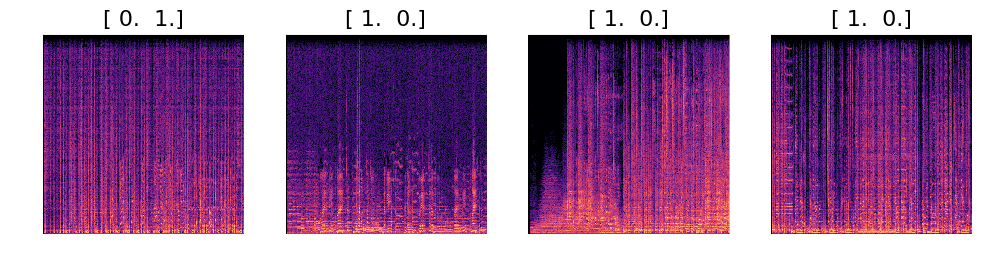

In [57]:
plot_batches = vgg.get_batches(os.path.join(dataset_path, "train"), batch_size=4)
imgs, labels = next(plot_batches)
plots(imgs, titles=labels)
vgg.predict(imgs, True)

----

### Below are a couple runs of model fitting + weight saving

We don't need to run these cells again if we already have the `vgg_weights_{n}.h5` files.

In [ ]:
# Save the model weights
model = vgg.model
model.save_weights(os.path.join(dataset_path, "vgg_weights_0.h5"))

In [ ]:
# Fit model further by running more epochs
model.fit_generator?
model.fit_generator(batches, samples_per_epoch=batches.N,
                    validation_data=val_batches, nb_val_samples=val_batches.N,
                    nb_epoch=nb_epoch)

In [ ]:
# Save weights again
model.save_weights(os.path.join(dataset_path, "vgg_weights_1.h5"))

In [37]:
# Run a single epoch
model.fit_generator(batches, samples_per_epoch=batches.N,
                    validation_data=val_batches, nb_val_samples=val_batches.N,
                    nb_epoch=1)

Epoch 1/1
954/954 [==============================] - 36s - loss: 0.5836 - acc: 0.7547 - val_loss: 0.4499 - val_acc: 0.8070


In [38]:
# Save weights yet again
model.save_weights(os.path.join(dataset_path, "vgg_weights_2.h5"))

In [44]:
# Save entire model
vgg.model.save(os.path.join(dataset_path, "vgg_model_2.h5"))